In [1]:
import copy as cp
import numpy as np
import matplotlib.pyplot as plt
import distinct_colours_py3 as dc


In [2]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=20.) #24 normally #32 for convergence; violinplot

plt.rc('axes', linewidth=1.5)
plt.rc('xtick.major', width=1.5)
plt.rc('xtick.minor', width=1.5)
plt.rc('ytick.major', width=1.5)
plt.rc('ytick.minor', width=1.5)


In [3]:
##Load matter power spectra
#fnames = ['/home/keir/Software/axionEmu/axion_best_fit_eBOSS_Planck_LCDM_matterpower_z3.dat', '/home/keir/Software/axionEmu/running_Planck+Ext+eBOSS_pk.dat', '/home/keir/Software/axionEmu/axion_best_fit_eBOSS_Planck_matterpower_z3.dat', '/home/keir/Software/axionEmu/WDM_Planck+Ext+eBOSS_pk.dat']
#fnames = ['/home/keir/Software/axionEmu/axion_best_fit_eBOSS_Planck_LCDM_matterpower_z3.dat', '/home/keir/Software/axionEmu/axion_best_fit_eBOSS_Planck_matterpower_z3.dat']
fnames = ['LCDM_Planck+Ext', 'mnu_Planck+Ext+eBOSS', 'running_Planck+Ext+eBOSS', 'axion_Planck+Ext+eBOSS', 'WDMv2fmax_Planck+Ext+eBOSS']
matter_powers = [None] * len(fnames)
for i, fname in enumerate(fnames):
    matter_powers[i] = np.loadtxt('/home/keir/Data/best_fit_Planck_eBOSS/%s_pk.dat'%fname)


IndexError: list index out of range

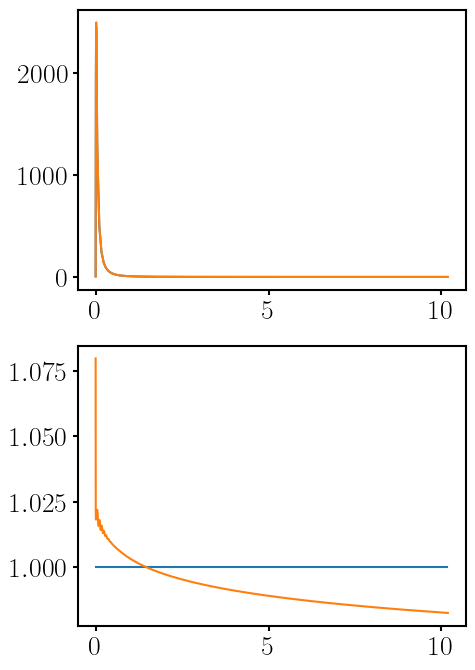

In [4]:
#Plot matter power spectra
%matplotlib inline
power_labels = ['LCDM', 'Best-fit axion']
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(5., 8.))
for i, matter_power in enumerate(matter_powers):
    axes[0].plot(matter_power[:, 0], matter_power[:, 1], label=power_labels[i]) #* (matter_power[:, 0] ** 3.)
    axes[1].plot(matter_power[:, 0], matter_power[:, 1] / matter_powers[0][:, 1])
axes[0].set_xscale('log')
axes[1].set_xscale('log')
axes[0].set_yscale('log')
axes[1].set_xlabel('k [h/Mpc]')
axes[0].set_ylabel('P(k) [(Mpc/h)^3]')
axes[1].set_ylabel('P(k) / P(k) [LCDM]')
axes[0].legend(frameon=False)


In [ ]:
matter_powers[0][:,0]
print(np.where(matter_powers[0][:,0] > 1.))
print(matter_powers[0][np.array([610, 611]), 0])

print(np.where(matter_powers[2][:,0] > 1.))
print(matter_powers[2][np.array([610, 611]), 0])

print(np.where(matter_powers[4][:,0] > 1.))
print(matter_powers[4][np.array([611, 612]), 0])


In [5]:
##Calculate power amplitude and tilt
power_amplitude = np.zeros(len(matter_powers))
power_tilt = np.zeros_like(power_amplitude)
k_samp = 10. ** np.linspace(-2.1, 1.5, num=10000)

for i in range(power_amplitude.shape[0]):
    k_piv_idx = np.where(k_samp > 1.)[0][0]
    print(k_piv_idx)

    matter_power_interp = 10. ** np.interp(np.log10(k_samp), np.log10(matter_powers[i][:, 0]), np.log10(matter_powers[i][:, 1]))
    #if i == 0:
    #    matter_power_interp_LCDM = cp.deepcopy(matter_power_interp)

    power_amplitude[i] = matter_power_interp[k_piv_idx-1]
    power_tilt[i] = (np.log(matter_power_interp[k_piv_idx]) - np.log(matter_power_interp[k_piv_idx - 1])) / (np.log(k_samp[k_piv_idx]) - np.log(k_samp[k_piv_idx - 1]))
print(power_amplitude, power_tilt)
print(power_amplitude / power_amplitude[0])


5833
5833
5833
5833
5833
[6.77598622 6.82254778 6.50850704 6.07916812 6.3716721 ] [-2.30042464 -2.30883823 -2.33153898 -2.33733814 -2.33335729]
[1.         1.00687155 0.96052542 0.89716359 0.94033132]


In [ ]:
print(k_samp)


In [6]:
##Calculate rescaled power spectra
matter_power_rescaled_all = [None,] * len(matter_powers)

for i in range(len(matter_power_rescaled_all)):
    matter_power_rescaled = matter_powers[i][:, 1] * power_amplitude[0] / power_amplitude[i]
    matter_power_rescaled_all[i] = np.log(matter_power_rescaled) + ((power_tilt[0] - power_tilt[i]) * (np.log(matter_powers[i][:, 0]) - np.log(1.)))


In [7]:
error_eBOSS = np.loadtxt('/home/keir/Software/axionEmu/DR14_pm3d_19kbins_data.txt')
frac_error_eBOSS = error_eBOSS[:, 2] / error_eBOSS[:, 1]
print(frac_error_eBOSS)


[0.32750611 0.25411652 0.20229351 0.15853475 0.18207413 0.25295118
 0.21245524 0.2367462  0.25194808 0.29042048 0.32007679 0.40674786
 0.32129933 0.61357836 0.65593766 0.96726019 0.77813319 0.54997302
 2.67713547]


In [ ]:
#Plot matter power spectra
%matplotlib inline
power_labels = ['LCDM', 'Best-fit axion']
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10., 16.))
for i, matter_power in enumerate(matter_powers):
    axes[0].plot(matter_power[:, 0], matter_power[:, 1], label=power_labels[i]) #* (matter_power[:, 0] ** 3.)
    axes[1].plot(matter_power[:, 0], matter_power[:, 1] / matter_powers[0][:, 1])

axes[1].plot(matter_powers[1][:, 0], np.exp(matter_power_rescaled_tilt_log) / matter_powers[0][:, 1])
axes[1].errorbar(x = error_eBOSS[:, 0] / 0.7, y = np.ones_like(error_eBOSS[:, 0]), yerr=frac_error_eBOSS)

axes[0].set_xscale('log')
axes[1].set_xscale('log')
axes[0].set_yscale('log')
axes[1].set_xlabel('k [h/Mpc]')
axes[0].set_ylabel('P(k) [(Mpc/h)^3]')
axes[1].set_ylabel('P(k) / P(k) [LCDM]')
axes[0].legend(frameon=False)
axes[1].set_ylim([0.8, 1.2])
plt.title('Green = rescaled axion matter power; red = eBOSS linear power errorbars')


In [ ]:
##Plot matter power spectra
#eBOSS likelihood
p_k_piv_eBOSS = 2. * (np.pi ** 2.) * 0.31
p_k_piv_eBOSS_err = 2. * (np.pi ** 2.) * 0.02

n_L_piv_eBOSS = -2.34
n_L_piv_eBOSS_err = 0.006

p_k_all_eBOSS_tilt1 = (p_k_piv_eBOSS - 0.) * (k_samp ** (-2.34 + 0.006))
p_k_all_eBOSS_tilt2 = (p_k_piv_eBOSS - 0.) * (k_samp ** (-2.34 - 0.006))
p_k_all_eBOSS_best_tilt = p_k_piv_eBOSS * (k_samp ** n_L_piv_eBOSS)
#p_k_all_eBOSS_tilt3 = (p_k_piv_eBOSS + p_k_piv_eBOSS_err) * (matter_powers[0][:, 0] ** (-2.34 + 0.006))
#p_k_all_eBOSS_tilt4 = (p_k_piv_eBOSS + p_k_piv_eBOSS_err) * (matter_powers[0][:, 0] ** (-2.34 - 0.006))
#p_k_all_eBOSS_min = np.concatenate((p_k_all_eBOSS_tilt1, p_k_all_eBOSS_tilt2))
p_k_all_LCDM = power_amplitude[0] * (k_samp ** power_tilt[0])

#k = matter_powers[0][:, 0]
k_eBOSS = (k_samp > np.min(error_eBOSS[:, 0] / 0.7)) * (k_samp < np.max(error_eBOSS[:, 0] / 0.7))

#%matplotlib inline
power_labels = [r'$\Lambda$CDM best fit', r'$\Sigma m_\nu$ best fit', r'$\alpha_\mathrm{s}$ best fit', r'ULA best fit', r'WDM best fit']

plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=28.) #24 normally #32 for convergence; violinplot

plt.rc('axes', linewidth=1.5)
plt.rc('xtick.major', width=1.5)
plt.rc('xtick.minor', width=1.5)
plt.rc('ytick.major', width=1.5)
plt.rc('ytick.minor', width=1.5)

plot_colours = dc.get_distinct(5)
plot_colours[3] = 'orange'

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10., 10.), height_ratios=[1,2], sharex=True)
power_derivs = [None] * len(matter_powers)
k_samp = 10. ** np.linspace(-2.1, 1.5, num=10000)

axes[1].fill_betweenx(y=[0.65, 1.2], x1=1.e-3, x2=0.2, color='#D3D3D3', label=r'\textit{Planck} CMB wavenumbers')
axes[1].fill_betweenx(y=[0.65, 1.2], x1=np.min(error_eBOSS[:, 0] / 0.7), x2=np.max(error_eBOSS[:, 0] / 0.7), color='#A9A9A9', label=r'eBOSS Ly-$\alpha$ forest wavenumbers')

axes[1].errorbar(1., p_k_piv_eBOSS / matter_power_interp_LCDM[k_piv_idx-1], yerr=p_k_piv_eBOSS_err / matter_power_interp_LCDM[k_piv_idx], color='black', marker='o', label=r'Compressed eBOSS data $\Delta_\mathrm{lin}^2$, $n_\mathrm{lin}$', lw=2.5)
#axes[1].plot(k_samp[k_eBOSS], (p_k_all_eBOSS_best_tilt / p_k_all_LCDM)[k_eBOSS], color='black', lw=2.5)
axes[1].fill_between(x=k_samp[k_eBOSS], y1=(p_k_all_eBOSS_tilt1 / p_k_all_LCDM)[k_eBOSS], y2=(p_k_all_eBOSS_tilt2 / p_k_all_LCDM)[k_eBOSS], color='black')

for i, matter_power in enumerate(matter_powers):
    power_derivs[i] = (np.log(matter_power[1:, 1]) - np.log(matter_power[:-1, 1])) / (np.log(matter_power[1:, 0]) - np.log(matter_power[:-1, 0]))

    matter_power_interp = 10. ** np.interp(np.log10(k_samp), np.log10(matter_power[:, 0]), np.log10(matter_power[:, 1]))
    if i == 0:
        matter_power_interp_LCDM = cp.deepcopy(matter_power_interp)

    axes[0].plot(matter_power[:, 0], matter_power[:, 1] * (matter_power[:, 0] ** 1.), label=power_labels[i], lw=2.5, color=plot_colours[i]) #* (matter_power[:, 0] ** 3.)
    axes[1].plot(k_samp, matter_power_interp / matter_power_interp_LCDM, lw=2.5, color=plot_colours[i])
    #axes[2].plot(matter_power[1:, 0], power_derivs[i])
#axes[1].axvline(x=0.3,color='black', ls=':')
#axes[1].axvline(x=4.,color='black', ls=':')
#axes[1].axvline(x=2.e-4,color='grey', ls=':')
#axes[1].axvline(x=0.15,color='grey', ls=':')

axes[0].set_xscale('log')
axes[1].set_xscale('log')
#axes[2].set_xscale('log')
axes[0].set_yscale('log')
axes[1].set_xlabel(r'Wavenumber $k\,(h\,\mathrm{Mpc}^{-1})$')
axes[0].set_ylabel(r'$k P(k,z)\,(\mathrm{Mpc}^2\,h^{-2})$')
axes[1].set_ylabel(r'$P(k,z) / P(k,z; \Lambda\mathrm{CDM})$')
#axes[2].set_ylabel('n_L')
axes[0].legend(frameon=False, fontsize=22.)
axes[1].legend(frameon=True, loc='lower left', fontsize=22., facecolor='white', framealpha=1., edgecolor='white')
axes[0].set_xlim([0.01, 10.])
axes[0].set_ylim([0.15, 90.])
axes[1].set_xlim([0.01, 10.])
axes[1].set_ylim([0.83, 1.03])

fig.subplots_adjust(hspace=0., left=0.13, right=0.97, top=0.99, bottom=0.1)
#axes[2].set_xlim([0.01, 5.])
#axes[2].set_ylim([-2.4, -2.3])
#plt.title('Green = rescaled axion matter power; red = eBOSS linear power errorbars')
plt.savefig('power_spectrum_best_fit12_all_v2.pdf')


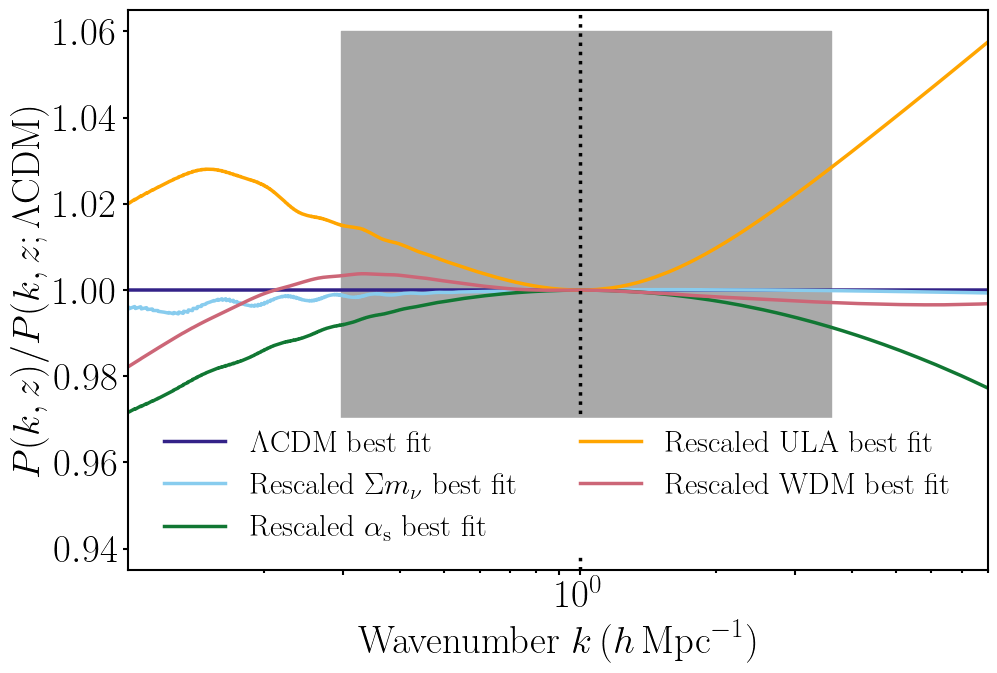

In [12]:
##Plot model residual
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=28.) #28 normally

plt.rc('axes', linewidth=1.5)
plt.rc('xtick.major', width=1.5)
plt.rc('xtick.minor', width=1.5)
plt.rc('ytick.major', width=1.5)
plt.rc('ytick.minor', width=1.5)

plot_colours = dc.get_distinct(5)
plot_colours[3] = 'orange'
power_labels = [r'$\Lambda$CDM best fit', r'Rescaled $\Sigma m_\nu$ best fit', r'Rescaled $\alpha_\mathrm{s}$ best fit', r'Rescaled ULA best fit', r'Rescaled WDM best fit']

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10., 6.67))
axes = [axes,]
#axes[0].axhline(y=1., color=plot_colours[0], label=r'$\Lambda$CDM best fit', lw=2.5)
for i in range(len(matter_power_rescaled_all)):
    matter_power_interp = np.exp(np.interp(np.log10(k_samp), np.log10(matter_powers[i][:, 0]), matter_power_rescaled_all[i]))
    if i == 0:
        matter_power_interp_LCDM = cp.deepcopy(matter_power_interp)

    axes[0].plot(k_samp, matter_power_interp / matter_power_interp_LCDM, label=power_labels[i], color=plot_colours[i], lw=2.5)
axes[0].axvline(x=1., color='black', ls=':', lw=2.5) #label=r'eBOSS Ly-$\alpha$ forest pivot wavenumber $k_\mathrm{p}$'
axes[0].fill_betweenx(y=[0.94, 1.06], x1=np.min(error_eBOSS[:, 0] / 0.7), x2=np.max(error_eBOSS[:, 0] / 0.7), color='#A9A9A9')
#, label=r'eBOSS Ly-$\alpha$ forest sensitivity'
axes[0].legend(frameon=True, fontsize=22., loc='lower center', facecolor='white', framealpha=1., edgecolor='white', ncol=2)
axes[0].set_xscale('log')
axes[0].set_xticks([0.3, 0.9, 1., 3.])
axes[0].set_xlabel(r'Wavenumber $k\,(h\,\mathrm{Mpc}^{-1})$')
axes[0].set_ylabel(r'$P(k,z) / P(k,z; \Lambda\mathrm{CDM})$')
#axes[0].set_xlim([0.27, 4.])
axes[0].set_xlim([0.1, 8.])
axes[0].set_ylim([0.935, 1.065])

fig.subplots_adjust(left=0.13, right=0.99, top=0.99, bottom=0.15)
plt.savefig('model_residual_best_fit8_v2_extend_range.pdf')
